In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
import sys
from tqdm.auto import tqdm
import pandas as pd
import networkx as nx

In [4]:
project_root = os.path.abspath(
    os.path.join("C:/Users/jllgo/OneDrive/Documentos/UFMG/MSc & MSI 2/MatchSegmentation")
)
if project_root not in sys.path:
    sys.path.append(project_root)

In [5]:
from src.pass_networks.process_intervals import load_graphs
from src.pass_networks.process_match_info import get_match_info

In [6]:
PROCESSED_DATA_PATH = "../data/processed/PL-22-23"
CSV_DATA_PATH = "../data/csv"

In [7]:
games = os.listdir(PROCESSED_DATA_PATH)
game_ids = [game.split('.')[0] for game in games]
print(f"Games to process: {len(game_ids)}")

Games to process: 175


In [8]:
matches = []

for match_id in tqdm(game_ids, desc="Loading Graphs", total=len(game_ids)):
    match_graphs = load_graphs(match_id, PROCESSED_DATA_PATH)
    matches += match_graphs

matches_df = pd.DataFrame(matches)
matches_df

Loading Graphs:   0%|          | 0/175 [00:00<?, ?it/s]

,match_id,interval_id,team_id,graph
0,4436,1.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
1,4436,1.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)"
2,4436,2.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
3,4436,2.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)"
4,4436,3.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
...,...,...,...,...
17225,4625,48.0,221,"(-1, 24, 30, 16, 8, 1, 7, 22, 4, 15, 23, 31)"
17226,4625,49.0,16,"(-1, 2, 8, 17, 24, 10, 22, 6, 9, 23, 31, 7)"
17227,4625,49.0,221,"(-1, 24, 30, 16, 8, 1, 7, 22, 4, 15, 23, 31)"
17228,4625,50.0,16,"(-1, 2, 8, 17, 24, 10, 22, 6, 9, 23, 31, 7)"


In [9]:
players_info, teams_info, games_info = get_match_info(CSV_DATA_PATH)

In [10]:
matches_df

,match_id,interval_id,team_id,graph
0,4436,1.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
1,4436,1.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)"
2,4436,2.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
3,4436,2.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)"
4,4436,3.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
...,...,...,...,...
17225,4625,48.0,221,"(-1, 24, 30, 16, 8, 1, 7, 22, 4, 15, 23, 31)"
17226,4625,49.0,16,"(-1, 2, 8, 17, 24, 10, 22, 6, 9, 23, 31, 7)"
17227,4625,49.0,221,"(-1, 24, 30, 16, 8, 1, 7, 22, 4, 15, 23, 31)"
17228,4625,50.0,16,"(-1, 2, 8, 17, 24, 10, 22, 6, 9, 23, 31, 7)"


Vis

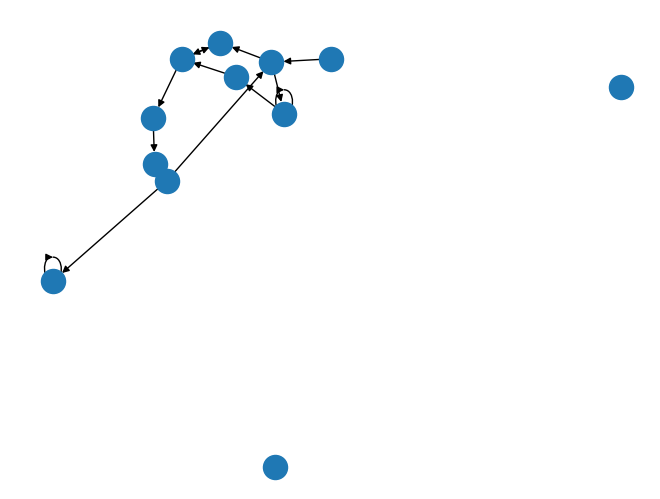

In [11]:
G = matches_df['graph'][0]
nx.draw(G)

In [12]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

In [13]:
teams_info

,team_id,team_name,team_short_name,team_country,primary_color,secondary_color
0,1,AFC Bournemouth,BOU,England,#E20613,#000000
1,2,Arsenal,ARS,England,#E10B17,#FFFFFF
2,3,Aston Villa,AVL,England,#660E36,#93BDE4
3,4,Brighton & Hove Albion,BHA,England,#0A55A2,#FFFFFF
4,6,Chelsea,CHE,England,#184890,#1D1D1D
5,7,Crystal Palace,CRY,England,#DF2443,#3258A3
6,8,Everton,EVE,England,#0B478F,#FFFFFF
7,9,Leicester City,LCI,England,#233A80,#FFFFFF
8,10,Liverpool,LIV,England,#D01317,#FFFFFF
9,11,Manchester City,MCI,England,#6CABDD,#FFFFFF


In [24]:
def draw_pass_network(df, match_id, interval_id, teams_info, team_id):

    match_df = df[df['match_id'] == match_id].reset_index(drop=True)

    pitch = Pitch(pitch_type='impect', pitch_length=105, pitch_width=68)
    fig, ax = pitch.draw()
    team_info = teams_info[teams_info['team_id'] == team_id]
    team_color = team_info['primary_color'].values[0] if team_info['primary_color'].values[0] != '#FFFFFF' else team_info['secondary_color'].values[0]
    team_name = team_info['team_name'].values[0]

    G = match_df[(match_df['team_id'] == team_id) & (match_df['interval_id'] == interval_id)]['graph'].values[0]

    pos = nx.get_node_attributes(G, 'pos')
    edge_widths = [d['weight'] for (_, _, d) in G.edges(data=True)]



    # Usa draw_networkx, que chama internamente as funções para desenhar nós, arestas e rótulos
    nx.draw_networkx(
        G, 
        pos=pos, 
        with_labels=True, 
        node_size=500, 
        font_size=8, 
        width=edge_widths,
        node_color=team_color,
    )

    plt.title(f"Grafo da partida {match_id} no intervalo {int(interval_id)} - {team_name}")
    plt.show()

mc_matches = matches_df[matches_df['team_id']==119].reset_index(drop=True)

for match_id in mc_matches['match_id'].unique()[20:23]:
    for interval_id in matches_df[matches_df['match_id'] == match_id]['interval_id'].unique():
        try:
            draw_pass_network(matches_df, match_id, interval_id, teams_info, 119)
        except:
            pass

In [20]:
from matplotlib.lines import Line2D

def draw_interval_pass_network(matches, interval_id, match_id, teams_info):

    match_data = matches[(matches['match_id'] == match_id) & (matches['interval_id'] == interval_id)]    
    team_ids = match_data['team_id'].unique()


    pitch = Pitch(pitch_type='impect', pitch_length=105, pitch_width=68)
    fig, ax = pitch.draw()

    team_names = []
    legend_elements = []

    for team_id in team_ids:
        G = match_data.loc[match_data['team_id']==team_id]['graph'].values[0]

        team_info = teams_info[teams_info['team_id'] == team_id]
        team_color = team_info['primary_color'].values[0] if team_info['primary_color'].values[0] != '#FFFFFF' else team_info['secondary_color'].values[0]
        team_name = team_info['team_name'].values[0]

        pos = nx.get_node_attributes(G, 'pos')  # pega as posições dos nós
        edge_widths = [d['weight'] for (_, _, d) in G.edges(data=True)]  # lista de weights

        # Usa draw_networkx, que chama internamente as funções para desenhar nós, arestas e rótulos
        nx.draw_networkx(
            G, 
            pos=pos, 
            with_labels=True, 
            node_size=500, 
            font_size=8, 
            width=edge_widths,
            node_color=team_color,
        )

        team_names.append(team_name)

        legend_elements.append(Line2D([0], [0], marker='o', color='w', label=team_name,
                                      markerfacecolor=team_color, markersize=10))

    # Adiciona a legenda com os círculos coloridos
    ax.legend(handles=legend_elements, loc='upper right', title='Teams')

    plt.title(f"Graph of interval {interval_id}")
    plt.show()

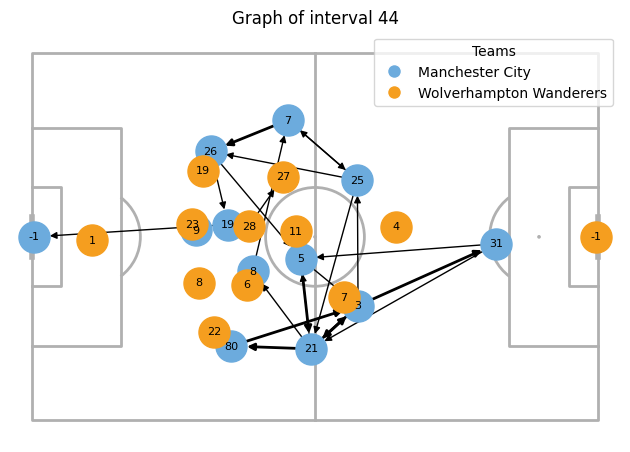

In [21]:
draw_interval_pass_network(matches_df,44,4515, teams_info)

# Stream

In [146]:
import numpy as np


In [169]:
stream = np.random.uniform(low=0, high=5, size=(50,))
minutes = [i*2 for i in range(stream.size)]
stream, minutes

(array([2.75108787, 3.64086554, 2.45154261, 0.9857134 , 4.79750491,
        4.23732452, 3.51379582, 0.82182627, 3.41660892, 1.66815525,
        1.24377609, 1.58313632, 4.07741873, 1.81424816, 2.01719376,
        3.69396157, 1.40112841, 3.71192481, 2.70810196, 2.66996437,
        3.58730457, 0.71180042, 2.0923231 , 2.38648943, 2.58111385,
        0.29440512, 1.4432876 , 0.91702385, 1.13733252, 2.14921383,
        3.2864344 , 2.69573167, 2.35199653, 3.56931504, 4.19166985,
        3.09344501, 0.44022302, 4.21956488, 4.41658596, 2.54452795,
        2.28449843, 1.42193727, 1.16029039, 1.06372299, 2.76275524,
        0.33416323, 4.72841292, 0.80162304, 2.10809955, 4.15842865]),
 [0,
  2,
  4,
  6,
  8,
  10,
  12,
  14,
  16,
  18,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  34,
  36,
  38,
  40,
  42,
  44,
  46,
  48,
  50,
  52,
  54,
  56,
  58,
  60,
  62,
  64,
  66,
  68,
  70,
  72,
  74,
  76,
  78,
  80,
  82,
  84,
  86,
  88,
  90,
  92,
  94,
  96,
  98])

In [173]:
drifts = np.random.randint(low=0, high=40, size=(4,))
drifts

array([31, 23, 39, 19], dtype=int32)

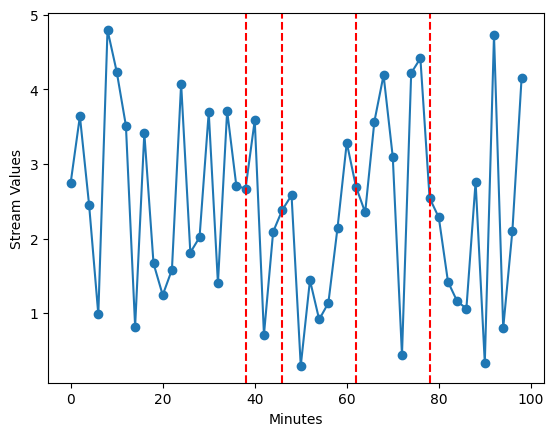

In [176]:
fig, ax = plt.subplots()

# Plota os valores de 'stream' com 'minutes' no eixo x
ax.plot(minutes, stream, marker='o', linestyle='-')

# Adiciona linhas verticais nos pontos de drift
for drift in drifts:
    ax.axvline(x=minutes[drift], color='red', linestyle='--')

# Define os rótulos dos eixos
ax.set_xlabel('Minutes')
ax.set_ylabel('Stream Values')

# Exibe o gráfico
plt.show()